In [1]:
#import modules
from statsbombpy import sb

import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier

import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
competitions = sb.competitions()

In [4]:
help(sb.matches)

Help on function matches in module statsbombpy.sb:

matches(competition_id: int, season_id: int, fmt='dataframe', creds: dict = {'user': None, 'passwd': None})



In [5]:
# events = sb.competition_events(
#     country="England",
#     division= "Premier League",
#     season="2015/2016",
#     gender="male"
# )

In [6]:
#events.columns

In [7]:
competitions[
    (competitions['competition_name'].isin([
    'Premier League', '1. Bundesliga', 'La Liga', 'Ligue 1', 'Serie A']))
             & 
    (competitions['season_name']=='2015/2016')
            ]

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
41,11,27,Spain,La Liga,male,False,False,2015/2016,2023-09-20T17:21:32.111535,2021-06-13T16:17:31.694,None,2023-09-20T17:21:32.111535
58,7,27,France,Ligue 1,male,False,False,2015/2016,2023-12-13T00:27:57.162379,None,None,2023-12-13T00:27:57.162379
62,2,27,England,Premier League,male,False,False,2015/2016,2023-11-14T11:25:33.476498,2021-06-13T16:17:31.694,None,2023-11-14T11:25:33.476498
64,12,27,Italy,Serie A,male,False,False,2015/2016,2023-12-13T17:32:46.423081,None,None,2023-12-13T17:32:46.423081


In [8]:
#competitions[competitions['competition_name']=='Champions League']

In [9]:
PremierLeague = sb.matches(competition_id=2, season_id=27)
PremierLeague.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2


In [10]:
PremierLeague.columns

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')

In [11]:
print(pd.unique(PremierLeague['home_team']))

['Leicester City' 'West Bromwich Albion' 'Newcastle United' 'Everton'
 'Crystal Palace' 'Arsenal' 'Tottenham Hotspur' 'Sunderland' 'Aston Villa'
 'Liverpool' 'Stoke City' 'Manchester United' 'AFC Bournemouth'
 'Swansea City' 'Southampton' 'Norwich City' 'Chelsea' 'Watford'
 'Manchester City' 'West Ham United']


In [12]:
elevations = {'King Power Stadium ': 57, 'The Hawthorns': 166, "St. James'' Park": 78, 'Goodison Park': 47,
 'Selhurst Park': 54, 'Emirates Stadium': 31, 'White Hart Lane': 20, 'Stadium of Light': 40,
 'Villa Park': 105, 'Anfield ': 66, 'bet365 Stadium': 131, 'Old Trafford':43,
 'Vitality Stadium': 33,'Swansea.com Stadium': 15, "St. Mary''s Stadium": 1,
 'Carrow Road': 7, 'Stamford Bridge':11, 'Vicarage Road':70, 'Etihad Stadium': 60,
 'Boleyn Ground':11}

In [13]:
PremierLeague.iloc[0]

match_id                                    3754058
match_date                               2016-01-02
kick_off                               16:00:00.000
competition                England - Premier League
season                                    2015/2016
home_team                            Leicester City
away_team                           AFC Bournemouth
home_score                                        0
away_score                                        0
match_status                              available
match_status_360                         processing
last_updated             2021-10-29T23:44:19.940296
last_updated_360            2021-06-12T16:17:31.694
match_week                                       20
competition_stage                    Regular Season
stadium                         King Power Stadium 
referee                              Andre Marriner
home_managers                       Claudio Ranieri
away_managers                            Eddie Howe
data_version

In [14]:
example = sb.events(match_id=3754037)
example.columns

Index(['ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_end_location', 'pass_goal_assist', 'pass_height',
   

In [15]:
relevant_attributes = ['minute', 'second', 'team', 'shot_statsbomb_xg',
                       'player', 'position', 'location', 'shot_body_part',
       'shot_end_location', 'shot_first_time', 
         'shot_technique',
       'shot_type', 'type','shot_outcome']

In [16]:
# check_attributes = ['pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
#        'pass_cut_back', 'pass_end_location', 'pass_goal_assist', 'pass_height',
#        'pass_inswinging', 'pass_length', 'pass_no_touch', 'pass_outcome',
#        'pass_outswinging', 'pass_recipient', 'pass_recipient_id',
#        'pass_shot_assist', 'pass_straight', 'pass_switch', 'pass_technique',
#        'pass_type', 'type', 'shot_outcome', 'location']
# first_match_df = pd.DataFrame(columns=check_attributes)
# for match in PremierLeague['match_id'][:1]:
#     match_df = sb.events(match_id=match)
#     relevant_match_df = match_df[relevant_attributes][match_df['type']=='Shot']
#     first_match_df = pd.concat([first_match_df, relevant_match_df], ignore_index=True)

# first_match_df['shot_outcome'] = first_match_df['shot_outcome'].replace(to_replace={'Off T': 0, 'Blocked': 0, 'Saved': 0, 'Goal': 1, 'Wayward': 0, 'Post': 0,
#                'Saved to Post': 0, 'Saved Off Target': 0})

# first_match_df['distance'] = first_match_df.apply(lambda row: np.sqrt(np.abs(row.location[0]-120)**2 + 
#                                                      np.abs(row.location[1]-40)**2), axis=1)
# first_match_df

In [17]:
Premier_League_shots_df = pd.DataFrame(columns=relevant_attributes)

In [18]:
start = time.time()
for match in PremierLeague['match_id']:#[:10]:
    match_df = sb.events(match_id=match)
    relevant_match_df = match_df[relevant_attributes][match_df['type']=='Shot']
    Premier_League_shots_df = pd.concat([Premier_League_shots_df, relevant_match_df], ignore_index=True)

Premier_League_shots_df['shot_outcome'] = Premier_League_shots_df['shot_outcome'].replace(
    to_replace={'Off T': 0, 'Blocked': 0, 'Saved': 0, 'Goal': 1, 'Wayward': 0, 'Post': 0,
               'Saved to Post': 0, 'Saved Off Target': 0})

Premier_League_shots_df['distance'] = Premier_League_shots_df.apply(lambda row: np.sqrt(np.abs(
    row.location[0]-120)**2 + np.abs(row.location[1]-40)**2), axis=1)
Premier_League_shots_df['shot_angle'] = Premier_League_shots_df.apply(
    lambda row: np.arctan2(np.abs(40-row.location[1]), np.abs(120-row.location[0])), axis=1)
end = time.time()
print(f'script run time: {(end - start)/60} minutes')
Premier_League_shots_df

script run time: 6.510661546389262 minutes


,minute,second,team,shot_statsbomb_xg,player,position,location,shot_body_part,shot_end_location,shot_first_time,shot_technique,shot_type,type,shot_outcome,distance,shot_angle
0,1,33,AFC Bournemouth,0.020838,Junior Stanislas,Left Midfield,"[107.1, 26.6]",Right Foot,"[109.7, 30.1]",NaN,Normal,Open Play,Shot,0,18.600269,0.804407
1,4,23,AFC Bournemouth,0.034462,Joshua King,Center Forward,"[113.7, 54.0]",Right Foot,"[114.5, 52.6]",NaN,Normal,Open Play,Shot,0,15.352199,1.147942
2,9,20,Leicester City,0.035481,Riyad Mahrez,Right Midfield,"[115.7, 50.5]",Left Foot,"[120.0, 43.3, 3.6]",True,Overhead Kick,Open Play,Shot,0,11.346365,1.182107
3,13,11,AFC Bournemouth,0.383711,Joshua King,Center Forward,"[113.9, 38.6]",Head,"[120.0, 46.0, 1.2]",NaN,Normal,Open Play,Shot,0,6.258594,0.225601
4,25,47,Leicester City,0.036740,José Leonardo Ulloa,Right Center Forward,"[96.7, 47.2]",Right Foot,"[103.9, 40.1]",NaN,Half Volley,Open Play,Shot,0,24.387087,0.299705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903,72,28,Swansea City,0.115056,Wayne Routledge,Left Wing,"[109.1, 29.8]",Right Foot,"[115.7, 37.8, 0.0]",NaN,Normal,Open Play,Shot,0,14.928161,0.752235
9904,74,15,Chelsea,0.126068,Eden Hazard,Left Wing,"[114.6, 51.4]",Right Foot,"[117.8, 45.3, 1.2]",NaN,Normal,Open Play,Shot,0,12.614278,1.128422
9905,75,6,Chelsea,0.023097,Branislav Ivanović,Right Back,"[98.3, 56.9]",Right Foot,"[104.8, 51.2]",NaN,Normal,Open Play,Shot,0,27.504545,0.661681
9906,80,12,Swansea City,0.029767,André Ayew Pelé,Right Wing,"[102.9, 58.1]",Left Foot,"[116.9, 43.6, 2.1]",NaN,Normal,Open Play,Shot,0,24.900201,0.813800


## Describing the Data

In [19]:
Premier_League_shots_df.describe()

,shot_statsbomb_xg,shot_outcome,distance,shot_angle
count,9908.000000,9908.000000,9908.000000,9908.000000
mean,0.098045,0.099717,19.071931,0.480076
std,0.135078,0.299638,8.291229,0.322701
min,0.000180,0.000000,0.921954,0.000000
25%,0.028966,0.000000,12.126417,0.212517
50%,0.052942,0.000000,18.791620,0.443448
75%,0.101133,0.000000,25.339840,0.707997
max,0.995122,1.000000,86.137100,1.565668


In [20]:
Premier_League_shots_df = Premier_League_shots_df[Premier_League_shots_df.shot_type != 'Corner']

In [21]:
Premier_League_shots_df['shot_outcome'].value_counts()

shot_outcome
0    8920
1     987
Name: count, dtype: int64

In [22]:
Premier_League_team_summary_df = pd.DataFrame(columns = ['team', 'shots', 'goals', 'statsbomb_xg'])
for team in pd.unique(Premier_League_shots_df['team']):
    shot_sum = Premier_League_shots_df['team'].value_counts()[team]
    goal_sum = sum(Premier_League_shots_df[Premier_League_shots_df['team']==team]['shot_outcome'])
    statsbomb_xg_sum = sum(Premier_League_shots_df[Premier_League_shots_df['team']==team]['shot_statsbomb_xg'])
    new_row = pd.Series({'team': team, 'shots': shot_sum, 'goals': goal_sum, 'statsbomb_xg': statsbomb_xg_sum})
    Premier_League_team_summary_df.loc[len(Premier_League_team_summary_df)]=new_row
Premier_League_team_summary_df = Premier_League_team_summary_df.sort_values(by=['shots'], ascending=False)
Premier_League_team_summary_df

,team,shots,goals,statsbomb_xg
11,Tottenham Hotspur,656,68,62.356203
10,Liverpool,635,62,58.373657
12,Manchester City,614,71,64.555055
9,Arsenal,583,62,65.136126
17,West Ham United,559,64,54.526547
14,Chelsea,535,55,53.579995
19,Southampton,527,57,54.223258
1,Leicester City,525,67,66.282171
6,Everton,498,56,50.614745
7,Crystal Palace,477,38,42.383496


In [23]:
Premier_League_shots_df.columns

Index(['minute', 'second', 'team', 'shot_statsbomb_xg', 'player', 'position',
       'location', 'shot_body_part', 'shot_end_location', 'shot_first_time',
       'shot_technique', 'shot_type', 'type', 'shot_outcome', 'distance',
       'shot_angle'],
      dtype='object')

## Training Model

In [24]:
cap_x_df, y_df = pd.concat([Premier_League_shots_df.iloc[:,:-3], Premier_League_shots_df.iloc[:,-2:]], axis=1),Premier_League_shots_df.iloc[:,-3].to_frame()

In [25]:
train_cap_x_df, test_cap_x_df, train_y_df, test_y_df = \
train_test_split(cap_x_df, y_df,
                 test_size=0.20,
                random_state=42,
                 shuffle=True,
                stratify=y_df)

In [26]:
target_attr = 'shot_outcome'

In [27]:
numerical_attrs = ['distance', 'minute', 'shot_angle']

In [28]:
nominal_attrs = ['shot_technique', 'shot_type', 'shot_body_part', 'position', 'shot_first_time', 'position']

In [29]:
numerical_transformer = Pipeline(
        steps=[("imputer", SimpleImputer()),
               ("scaler", StandardScaler())]
    )

In [30]:
nominal_transformer = Pipeline(
        steps=[("imputer", SimpleImputer(strategy="most_frequent")),
               #('target_encoder', TargetEncoder(target_type=target_type, random_state=42)),
               ("target_encoder", OrdinalEncoder()),
               ("scaler", StandardScaler())
               ]
    )

In [31]:
preprocessor = ColumnTransformer(
        transformers=[
            ('numerical', numerical_transformer, numerical_attrs),
            ('nominal', nominal_transformer, nominal_attrs)
        ]
    )

## Try with Logistic Regression

In [32]:
estimator = LogisticRegression()

In [33]:
composite_estimator = Pipeline(steps=[('preprocessor', preprocessor), ('estimator', estimator)])

In [34]:
composite_estimator.fit(train_cap_x_df, train_y_df.values.ravel())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['distance', 'minute',
                                                   'shot_angle']),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('target_encoder',
                                                                   OrdinalEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['shot_technique',
                                                   'shot_type',
                                                   'shot_body_part', 'position',
                                                   'shot_first_time',
                                                   'position'])])),
                ('estimator', LogisticRegression())])

In [35]:
composite_estimator.predict_proba(train_cap_x_df)

array([[0.91026451, 0.08973549],
       [0.85184645, 0.14815355],
       [0.85980702, 0.14019298],
       ...,
       [0.97230667, 0.02769333],
       [0.99260435, 0.00739565],
       [0.99248304, 0.00751696]])

In [36]:
print("Training set actual goal information")
print(train_y_df[target_attr].value_counts())
print("Training set naive model total xG",sum(composite_estimator.predict_proba(train_cap_x_df)[:,1]))
print("Training set Statsbomb total xG:", sum(train_cap_x_df['shot_statsbomb_xg']))

Training set actual goal information
shot_outcome
0    7135
1     790
Name: count, dtype: int64
Training set naive model total xG 789.9998323127288
Training set Statsbomb total xG: 766.7092960433004


In [37]:
def plot_comparison(model1, model1_name, model2, model2_name, outcome):
    plt.scatter(model1, model2,c=outcome)
    plt.xlabel(model1_name)
    plt.ylabel(model2_name)
    plt.xlim(0,1.1)
    plt.ylim(0,1.1)
    #.legend(label=outcome
    z = np.polyfit(model1, model2,1)
    p = np.poly1d(z)
    plt.plot(model1, p(model1),"r--")
    print("y=%.2fx+%.2f"%(z[0],z[1]))
    print("$R^2$=", r2_score(model1,model2))

In [38]:
pd.unique(Premier_League_shots_df['shot_type'])

array(['Open Play', 'Penalty', 'Free Kick'], dtype=object)

In [39]:
test_predictions = composite_estimator.predict_proba(test_cap_x_df)

In [40]:
print("Test set actual goal information")
print(test_y_df[target_attr].value_counts())
print("Test set naive model total xG", sum(test_predictions[:,1]))
print("Statsbomb total xG:", sum(test_cap_x_df['shot_statsbomb_xg']))

Test set actual goal information
shot_outcome
0    1785
1     197
Name: count, dtype: int64
Test set naive model total xG 206.51242919937008
Statsbomb total xG: 204.72017508530024


In [41]:
print(test_y_df[target_attr].value_counts())

shot_outcome
0    1785
1     197
Name: count, dtype: int64


In [42]:
print("Statsbomb total xG:", sum(test_cap_x_df['shot_statsbomb_xg']))

Statsbomb total xG: 204.72017508530024


In [43]:
SBModel = test_cap_x_df['shot_statsbomb_xg']
proposed_model = test_predictions[:,1]
shot_outcome = test_y_df[target_attr]

y=1.13x+-0.01
$R^2$= 0.08989008124237341


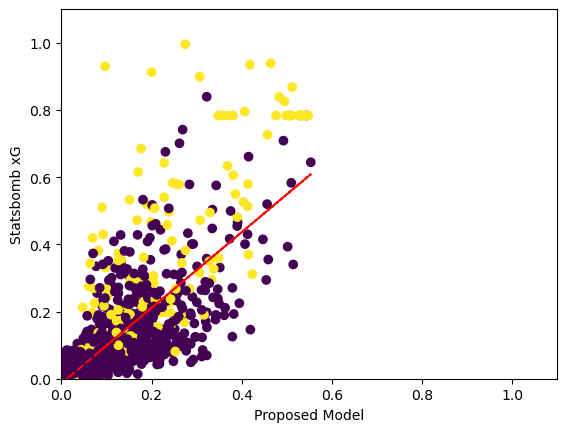

In [44]:
plot_comparison(proposed_model, "Proposed Model", SBModel, 'Statsbomb xG', shot_outcome)

In [45]:
model_summary = pd.DataFrame(columns = ['shots', 'goals', 'statsbomb_xg', 'proposed_model_xg'])
shots = len(test_y_df[target_attr])
goals = test_y_df[target_attr].value_counts()[1]
statsbomb_xg = sum(test_cap_x_df['shot_statsbomb_xg'])
proposed_model_xg = sum(test_predictions[:,1])
new_row = pd.Series({'shots': shots, 'goals': goals, 'statsbomb_xg': statsbomb_xg, 'proposed_model_xg': proposed_model_xg})
model_summary.loc[len(model_summary)]=new_row
model_summary

,shots,goals,statsbomb_xg,proposed_model_xg
0,1982.0,197.0,204.720175,206.512429


## Try with SGDClassifier

In [46]:
estimator = SGDClassifier(
        loss='log_loss', 
        penalty='l2', 
        alpha=0.0001, 
        l1_ratio=0.15, 
        fit_intercept=True, 
        max_iter=1000, 
        tol=0.001, 
        shuffle=True, 
        verbose=0, 
        epsilon=0.1, 
        n_jobs=None, 
        random_state=42, 
        learning_rate='optimal', 
        eta0=0.0, 
        power_t=0.5, 
        early_stopping=False, 
        validation_fraction=0.1, 
        n_iter_no_change=5, 
        class_weight=None, 
        warm_start=False, 
        average=False
    )

In [47]:
composite_estimator = Pipeline(steps=[('preprocessor', preprocessor), ('estimator', estimator)])

In [48]:
composite_estimator.fit(train_cap_x_df, train_y_df.values.ravel())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['distance', 'minute',
                                                   'shot_angle']),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('target_encoder',
                                                                   OrdinalEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['shot_technique',
                                                   'shot_type',
                                                   'shot_body_part', 'position',
                                                   'shot_first_time',
                                                   'position'])])),
                ('estimator', SGDClassifier(loss='log_loss', random_state=42))])

In [49]:
composite_estimator.predict_proba(train_cap_x_df)

array([[0.92313312, 0.07686688],
       [0.8502393 , 0.1497607 ],
       [0.84002691, 0.15997309],
       ...,
       [0.97189619, 0.02810381],
       [0.98402636, 0.01597364],
       [0.97970176, 0.02029824]])

In [50]:
print("Training set actual goal information")
print(train_y_df[target_attr].value_counts())
print("Training set naive model total xG",sum(composite_estimator.predict_proba(train_cap_x_df)[:,1]))
print("Training set Statsbomb total xG:", sum(train_cap_x_df['shot_statsbomb_xg']))

Training set actual goal information
shot_outcome
0    7135
1     790
Name: count, dtype: int64
Training set naive model total xG 900.1417944972223
Training set Statsbomb total xG: 766.7092960433004


In [51]:
def plot_comparison(model1, model1_name, model2, model2_name, outcome):
    plt.scatter(model1, model2,c=outcome)
    plt.xlabel(model1_name)
    plt.ylabel(model2_name)
    plt.xlim(0,1.1)
    plt.ylim(0,1.1)
    #.legend(label=outcome
    z = np.polyfit(model1, model2,1)
    p = np.poly1d(z)
    plt.plot(model1, p(model1),"r--")
    print("y=%.2fx+%.2f"%(z[0],z[1]))
    print("$R^2$=", r2_score(model1,model2))

In [52]:
pd.unique(Premier_League_shots_df['shot_type'])

array(['Open Play', 'Penalty', 'Free Kick'], dtype=object)

In [53]:
test_predictions = composite_estimator.predict_proba(test_cap_x_df)

In [54]:
print("Test set actual goal information")
print(test_y_df[target_attr].value_counts())
print("Test set naive model total xG", sum(test_predictions[:,1]))
print("Statsbomb total xG:", sum(test_cap_x_df['shot_statsbomb_xg']))

Test set actual goal information
shot_outcome
0    1785
1     197
Name: count, dtype: int64
Test set naive model total xG 234.27875027216962
Statsbomb total xG: 204.72017508530024


In [55]:
print(test_y_df[target_attr].value_counts())

shot_outcome
0    1785
1     197
Name: count, dtype: int64


In [56]:
print("Statsbomb total xG:", sum(test_cap_x_df['shot_statsbomb_xg']))

Statsbomb total xG: 204.72017508530024


In [57]:
SBModel = test_cap_x_df['shot_statsbomb_xg']
proposed_model = test_predictions[:,1]
shot_outcome = test_y_df[target_attr]

y=0.93x+-0.01
$R^2$= 0.09599428096486073


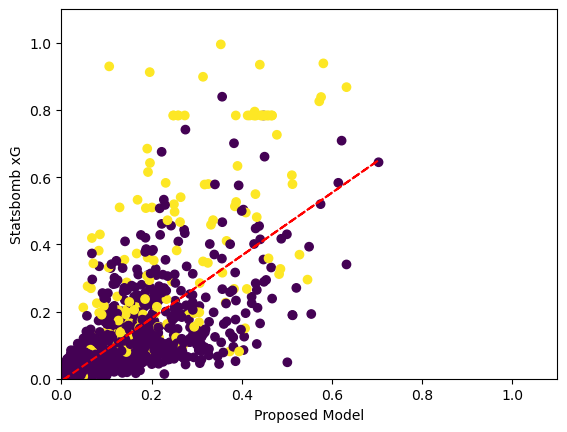

In [58]:
plot_comparison(proposed_model, "Proposed Model", SBModel, 'Statsbomb xG', shot_outcome)

In [59]:
model_summary = pd.DataFrame(columns = ['shots', 'goals', 'statsbomb_xg', 'proposed_model_xg'])
shots = len(test_y_df[target_attr])
goals = test_y_df[target_attr].value_counts()[1]
statsbomb_xg = sum(test_cap_x_df['shot_statsbomb_xg'])
proposed_model_xg = sum(test_predictions[:,1])
new_row = pd.Series({'shots': shots, 'goals': goals, 'statsbomb_xg': statsbomb_xg, 'proposed_model_xg': proposed_model_xg})
model_summary.loc[len(model_summary)]=new_row
model_summary

,shots,goals,statsbomb_xg,proposed_model_xg
0,1982.0,197.0,204.720175,234.27875


## Try with RandomForest Classifier

In [60]:
estimator = RandomForestClassifier(
    n_estimators=500, 
    criterion='gini', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features='sqrt', 
    max_leaf_nodes=16, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=-1, 
    random_state=42,
    verbose=0, 
    warm_start=False, 
    class_weight=None, 
    ccp_alpha=0.0, 
    max_samples=None
)

In [61]:
composite_estimator = Pipeline(steps=[('preprocessor', preprocessor), ('estimator', estimator)])

In [62]:
composite_estimator.fit(train_cap_x_df, train_y_df.values.ravel())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['distance', 'minute',
                                                   'shot_angle']),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('target_encoder',
                                                                   OrdinalEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['shot_technique',
                                                   'shot_type',
                                                   'shot_body_part', 'position',
                                                   'shot_first_time',
                                                   'position'])])),
                ('estimator',
                 RandomForestClassifier(max_leaf_nodes=16, n_estimators=500,
                                        n_jobs=-1, random_state=42))])

In [63]:
composite_estimator.predict_proba(train_cap_x_df)

array([[0.90232853, 0.09767147],
       [0.87693984, 0.12306016],
       [0.86214328, 0.13785672],
       ...,
       [0.94034329, 0.05965671],
       [0.94648945, 0.05351055],
       [0.93975004, 0.06024996]])

In [64]:
print("Training set actual goal information")
print(train_y_df[target_attr].value_counts())
print("Training set naive model total xG",sum(composite_estimator.predict_proba(train_cap_x_df)[:,1]))
print("Training set Statsbomb total xG:", sum(train_cap_x_df['shot_statsbomb_xg']))

Training set actual goal information
shot_outcome
0    7135
1     790
Name: count, dtype: int64
Training set naive model total xG 787.1027951264845
Training set Statsbomb total xG: 766.7092960433004


In [65]:
def plot_comparison(model1, model1_name, model2, model2_name, outcome):
    plt.scatter(model1, model2,c=outcome)
    plt.xlabel(model1_name)
    plt.ylabel(model2_name)
    plt.xlim(0,1.1)
    plt.ylim(0,1.1)
    #.legend(label=outcome
    z = np.polyfit(model1, model2,1)
    p = np.poly1d(z)
    plt.plot(model1, p(model1),"r--")
    print("y=%.2fx+%.2f"%(z[0],z[1]))
    print("$R^2$=", r2_score(model1,model2))

In [66]:
pd.unique(Premier_League_shots_df['shot_type'])

array(['Open Play', 'Penalty', 'Free Kick'], dtype=object)

In [67]:
test_predictions = composite_estimator.predict_proba(test_cap_x_df)

In [68]:
print("Test set actual goal information")
print(test_y_df[target_attr].value_counts())
print("Test set naive model total xG", sum(test_predictions[:,1]))
print("Statsbomb total xG:", sum(test_cap_x_df['shot_statsbomb_xg']))

Test set actual goal information
shot_outcome
0    1785
1     197
Name: count, dtype: int64
Test set naive model total xG 204.1290771523014
Statsbomb total xG: 204.72017508530024


In [69]:
print(test_y_df[target_attr].value_counts())

shot_outcome
0    1785
1     197
Name: count, dtype: int64


In [70]:
print("Statsbomb total xG:", sum(test_cap_x_df['shot_statsbomb_xg']))

Statsbomb total xG: 204.72017508530024


In [71]:
SBModel = test_cap_x_df['shot_statsbomb_xg']
proposed_model = test_predictions[:,1]
shot_outcome = test_y_df[target_attr]

y=1.29x+-0.03
$R^2$= 0.02289048003847549


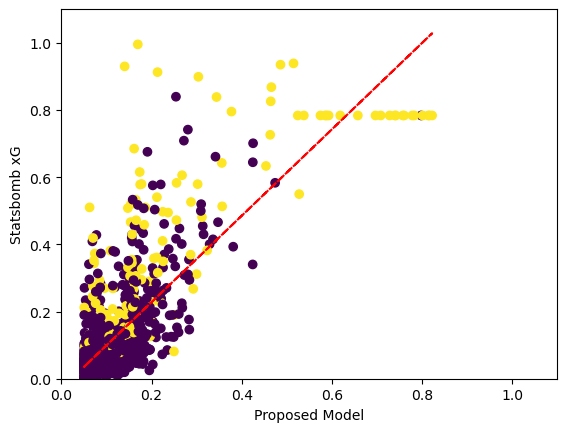

In [72]:
plot_comparison(proposed_model, "Proposed Model", SBModel, 'Statsbomb xG', shot_outcome)

In [73]:
model_summary = pd.DataFrame(columns = ['shots', 'goals', 'statsbomb_xg', 'proposed_model_xg'])
shots = len(test_y_df[target_attr])
goals = test_y_df[target_attr].value_counts()[1]
statsbomb_xg = sum(test_cap_x_df['shot_statsbomb_xg'])
proposed_model_xg = sum(test_predictions[:,1])
new_row = pd.Series({'shots': shots, 'goals': goals, 'statsbomb_xg': statsbomb_xg, 'proposed_model_xg': proposed_model_xg})
model_summary.loc[len(model_summary)]=new_row
model_summary

,shots,goals,statsbomb_xg,proposed_model_xg
0,1982.0,197.0,204.720175,204.129077
